# Защита персональных данных клиентов страховой компании

## Описание проекта:
Для защиты данных клиентов страховой компании разработаны методы преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Реализован простейший алгоритм защиты данных с сохранением их фактической ценности: шифрование данных выполнено с помощью умножения датасета на *случайную обратимую матрицу*.

Описание датесетов: 5000 наблюдений, каждое из которых представляет клиента компании и содержит 5 признаков: пол, возраст, зарплата, размер семьи и количество страховых выплат.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Эксперимент--проверки-оценки-качества-моделей" data-toc-modified-id="Эксперимент--проверки-оценки-качества-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Эксперимент  проверки оценки качества моделей</a></span></li><li><span><a href="#Вывод-по-результатам-эксперимента" data-toc-modified-id="Вывод-по-результатам-эксперимента-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод по результатам эксперимента</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-проекту:" data-toc-modified-id="Вывод-по-проекту:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по проекту:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from numpy.linalg import inv,det
from numpy.random import RandomState

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [25]:
try:
    data = pd.read_csv('/datasets/insurance.csv',sep=',')
except:
    data = pd.read_csv('insurance.csv',sep=',')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
3536,1,42.0,52900.0,1,1
4962,0,49.0,32500.0,1,2
4702,0,33.0,33700.0,2,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Количество дубликатов: 153
Матрица диаграмм:


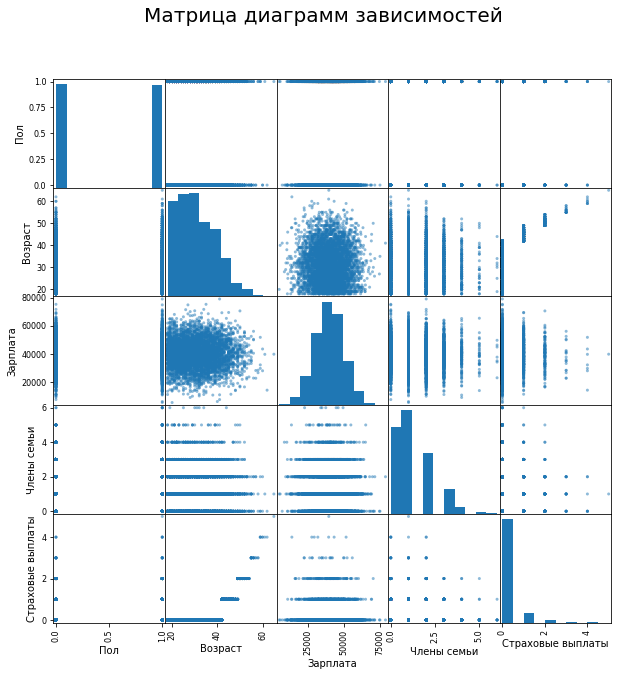

Heatmap корреляций:


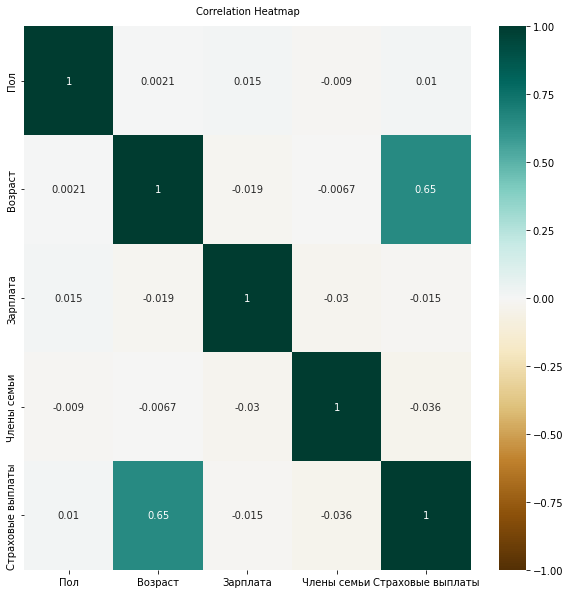

In [26]:
print(data.info())
display(data.head())
display(data.sample(3))
display(data.describe(include='all'))
print('Количество дубликатов:', data.duplicated().sum())
print('Матрица диаграмм:')
pd.plotting.scatter_matrix(data,figsize=(10,10))
plt.suptitle("Матрица диаграмм зависимостей", size=20)
plt.show()
print('Heatmap корреляций:')
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
plt.show()

In [27]:
def drop_dup(df):
    '''
        Input: df - таблица pd.DataFrame
        Output: None
        Description: Функция удаляет дубликаты, оставляя первое вхождение.

        '''
    df.drop_duplicates(inplace=True, ignore_index=False)
    df.reset_index(drop=True)
    
    
drop_dup(data)

### Вывод:

- Предоставленный датасет имеет 4 столбца признаков (Пол, Возраст и Зарплата , Члены семьи)  
- Один *целевой признак* Страховые выплаты  
- Размер данных - 5000 строк
- В данных имеются *дубликаты* в количестве 153 строки(были удалены)
- Так же целочисленные данные в столбцах Возраст и Зарплата имеют тип float (для нашей задачи данный недочет не критичен)
- Сильной корреляции меджу признаками и целевым признаком *нет*. Кроме как 0.65 между "возраст" и "страховые выплаты". Это умеренная корреляция.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной

**Ответ:**  **<span style="text-decoration: underline">Не изменится.</span>**

**Постараемся посмотреть процесс на примере.**  
- Разобьем наши данные на признаки и целевой признак;  
- Создадим обратимую матрицу и просчитаем оба варианта(без умножения на обратимую матрицу и с учетом умножения);  
- В заключении, сравнив значения `R2`, полученного для каждого из случаев.

### Эксперимент  проверки оценки качества моделей

In [29]:
# разбили выборку на признаки и целевой признак 'Страховые выплаты':

feathers = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [30]:
def quality_control(feathers,target):
    '''
    Input: feathers - таблица признаков (pd.DataFrame), целевой признак (pd.Series).
    Output: None
    Description: 1) Функция добавляет единичный столбец в матрицу признаков Х для применения 
                 сокращённой запись формулы линейной регрессии.  
                 2) Обучает две модели:
                     - по полученным признакам
                     - по признакам, домноженным на обратимую матрицу
                 3) Выводит качество получившихся предсказаний для наглядного сравнения.

    '''
    X = np.concatenate((np.ones((feathers.shape[0], 1)), feathers), axis=1)
    y = target
    r2_list = []
    index_list = ['До преобразования', 'После преобразования']
    
    for i in range(2):
        if i == 0:
            w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
            a = X.dot(w)
            r2 = r2_score(y, a)
            r2_list.append(r2)
        elif i == 1:
            Z = np.random.normal(size=(X.shape[1] ,X.shape[1]))
            if np.linalg.det(Z) != 0:
                XZ = X.dot(Z)
                w_XZ = np.linalg.inv(XZ.T.dot(XZ)).dot(XZ.T).dot(y)
                a_XZ = XZ.dot(w_XZ)
                r2_XZ = r2_score(y, a_XZ)
                r2_list.append(r2_XZ)
            else:
                print('Созданная матрица - не обратимая.')

    r2_df = pd.DataFrame(np.array(r2_list), index=[index_list], columns=['Коэффициент детерминации - r2'])
    print(r2_df)   

In [31]:
quality_control(feathers,target)

                      Коэффициент детерминации - r2
До преобразования                          0.430201
После преобразования                       0.430201


### Вывод по результатам эксперимента
Коэффициенты оценок качества модели и модели, умноженной на обратимую матрицу - **идентичны**.  
Докажем это.

**Обоснование:**   
  
Умножим признаки Х на обратимую матрицу Z и подставим эти данные в формулу обучения линейной регрессии.

Таким образом, измененная формула обучения, будет выглядеть так:

$$
w_{XZ} = ((XZ)^T (XZ))^{-1} (XZ)^T y
$$

Где $ZP$ - произведение признаков Х на обратимую матрицу Z.  
  
  Тогда формула предсказания будет выглядеть так:  
$$
a_{XZ} = XZw_{XZ}
$$

  
Матричные выражения имеют те же алгебраические приоритеты, что и числовые, плюс некоторые специфические матричные операции, такие, как **транспонирование** и **нахождение обратной матрицы**. В преобразовании получившейся формулы предсказания, нам понадобятся следующие свойства (каждое из них выделим соответствующим цветом, для наглядности):  
  
Одно из свойств **обратных матриц**:  
- Обратное значение произведения обратимых матриц A и B с одинаковым числом строк и столбцов будет равно значению, полученному при умножении матриц, обратных исходным, то есть: 
$$(\color{red}{\text{A}}B)^{-1}=B^{-1}\color{red}{\text{A}}^{-1} \; (\color{blue}{\text{свойство 1}}) $$      
  
Одно из свойств **транспонированных матриц**:  

- Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке: 
$$(\color{red}{\text{A}}  B)^{T}= B^{T}  \color{red}{\text{A}}^{T} \; (\color{red}{\text{свойство 2}})$$  

Свойство **обратимых матриц**:  

- Произведение квадратной матрицы $A$ (в нашем случае  $Z$) на ее обратимую матрицу $B$ ($Z^{-1}$), равно единичной матрице $I_n$.  
$$\color{red}{\text{A}}B = B\color{red}{\text{A}} = I_n \; (\color{green}{\text{свойство 3}}) $$

Учитывая данные свойства, можно поэтапно переписать формулу предсказания:  
- Выводя транспонированные матрицы за скобки, применяем <font color='red'><b>(свойство 2)</b></font>:  
$$
a_{XZ} = XZ(\color{red}{\text{$(XZ)^T$}} (XZ))^{-1} \color{red}{\text{$(XZ)^T$}} y\; \; \; \;\;     (1)
$$  
  
  
- Далее выводим за скобки обратимые матрицы Z согласно свойству (<font color='blue'><b>свойство 1</b></font>):

$$
a_{XZ} = XZ(\color{blue}{\text{$Z^T$}} X^T X\color{blue}{\text{$Z$}})^{-1} Z^T X^T y\; \; \; \;\;\;      \;\;(2)  
$$  
  
- На выходе получаем произведение обратимых матриц <font color='green'><b>(свойство 3)</b></font> и избавляемся от единичной матрицы:  



$$
a_{XZ} = X\color{green}{\text{$ZZ^{-1}$}}(X^TX)^{-1}\color{green}{\text{$(Z^T)^{-1} Z^T$}}X^T y\; \; \; \;\;\;\;     (3)
$$  

- В итоге, получаем формулу вывода предсказаний идентичную не перемноженной модели, подставив в конечное выражение $w$:

$$
a_{XZ} = X \color{brown}{\text{$(X^TX)^{-1}X^T y$}}\; \Rightarrow \; a_{XZ} = Xw\;\;\;\;\;\;      (6)
$$  
**Вывод:**  
<table style = "width:30%">
<tr>
<th>Предсказание</th>
<th>Формула</th>
</tr>
<tr>    
<td>До умножения</td>
<td>$a = Xw$</td>
</tr>
<tr>    
<td>После умножения</td>
<td>$a_{XZ} = Xw$</td>
</tr>

<div class="alert alert-block alert-success">
<b>Комментарий:</b> Не раскрыла $(X^T X)^{-1}$, так как для неквадратных матриц $X$ и $X^T$ обратных матриц не существует. 
</div>


## Алгоритм преобразования

**Алгоритм**

- Создайте квадратную, обратимую матрицу, размер которой соответствует количеству признаков обучающей выборки;
- Получаем новую обучающую выборку, путем умножения признаков на созданную обратимую матрицу  
    
    
   **Важные условия!**  
   - Определитель создаваемой обратимой матрицы не должен быть равен нулю (основное условие обратимости матрицы).
   - Размер содаваемой матрицы должен соответствовать количеству признаков обучаемой выборки, иначе умножение не возможно.

**Обоснование**

Обоснование отсутствия потери в качестве линейной регрессии, при использовании данного метода шифрования данных клиентов, представлено выше и подтверждено экспериментом.

## Проверка алгоритма

In [22]:
def check_algorithm(feathers_tr,target_tr):
    '''
    Input: feathers - таблица признаков (pd.DataFrame), целевой признак (pd.Series).
    Output: r2_df - таблица коэффициентов детерминации r2 (pd.DataFrame)
    Description: 1) Функция осуществляет проверку изменения качества линейной регрессии до преобразования и после.  
                 2) Обучает две модели:
                     - по полученным признакам
                     - по признакам, домноженным на обратимую матрицу
                 3) Выводит качество получившихся предсказаний для наглядного сравнения.

    '''
    X = feathers_tr
    y = target_tr
    r2_list = []
    index_list = ['До преобразования', 'После преобразования']
    
    for i in range(2): 
        # расчет модели и коэфициента r2 на непреобразованных данных
        if i == 0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=12345)
            model = LinearRegression()
            model.fit(X_train,y_train)
            predict = model.predict(X_test)
            
            r2 = r2_score(y_test,predict)
            r2_list.append(r2)
            
        elif i == 1:
            # расчет модели и коэфициента r2 на преобразованных данных
            Z = np.random.normal(size=(X.shape[1] ,X.shape[1]))
            if np.linalg.det(Z) != 0:  # проверка матрицы на обратимость сравнением ее определителя с нулем    
                XZ = X.dot(Z)
                X_train_conv, X_test_conv, y_train_conv, y_test_conv = train_test_split(XZ, y, 
                                                                                        train_size=0.75,random_state=12345)
                model_converted = LinearRegression()
                model_converted.fit(X_train_conv,y_train_conv)
                predict_converted = model_converted.predict(X_test_conv)
                
                r2_converted = r2_score(y_test_conv,predict_converted)
                r2_list.append(r2_converted)
            else:
                print('Созданная матрица - не обратимая.')
    
    r2_df = pd.DataFrame(np.array(r2_list), index=[index_list], columns=['Коэффициент детерминации r2'])
    return r2_df

    
    print(r2_df) 

In [23]:
check_algorithm(feathers,target)

,Коэффициент детерминации r2
До преобразования,0.423077
После преобразования,0.423077


### Вывод по проекту:

- Разработанный метод преобразования данных, работает корректно, качество линейной регрессии идентично непреобразованным данным. Восстановить персональную информацию данных клиентов, не имея информации о методе преобразования и о ключ-матрице достаточно сложно. Таким образом, в случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных, не потеряв в качестве модели. 